In [19]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
housedata = datasets.load_boston()
print(housedata.keys())
df = pd.DataFrame(data = housedata.data, columns=housedata.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


C:\Users\TFG155\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [21]:
housedata_target = housedata.target
df_target = pd.DataFrame(data = housedata_target, columns=['label'])
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

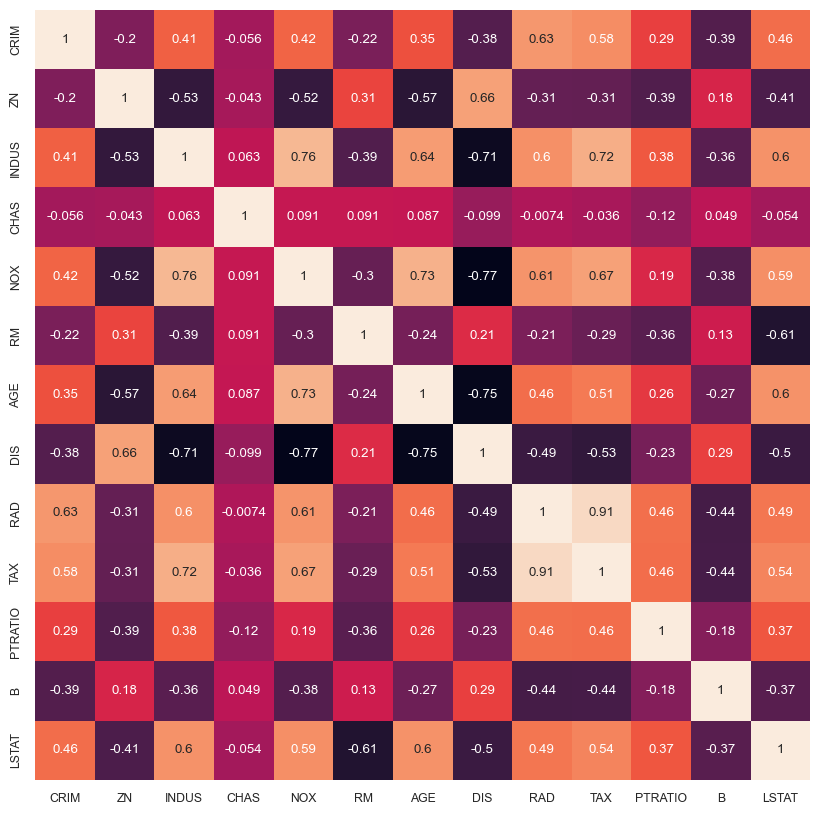

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.set(font_scale = 0.8)
sns.heatmap(df.corr(), annot=True,cbar=False)
plt.show()

In [23]:
data = pd.concat([df, df_target], axis=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


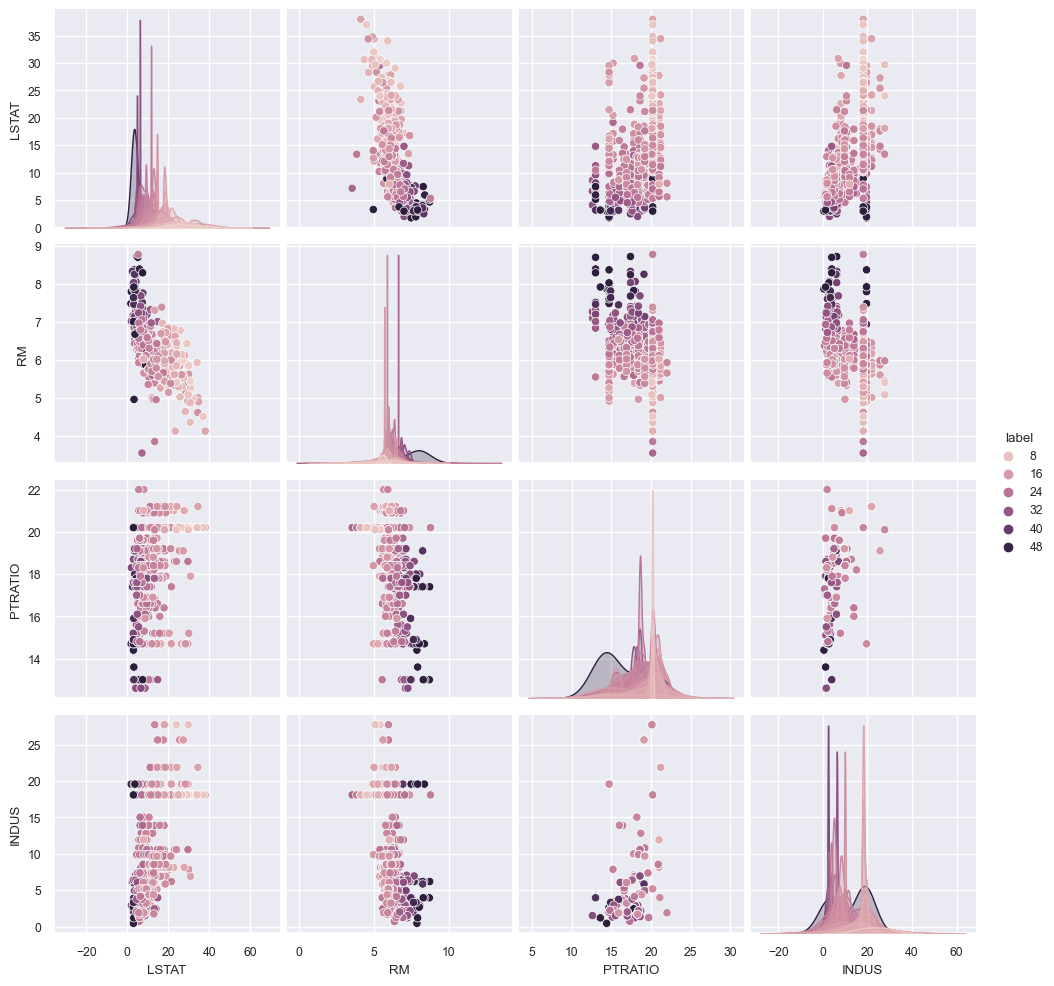

In [24]:
sns.pairplot(data,
             vars=['LSTAT', 'RM', 'PTRATIO', 'INDUS'],
            hue ='label')
plt.show()

In [25]:
#1. LSTAT, RM, PTRTIO, INDUS 만 추출 
X =data.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
y =data.loc[:, 'label']
X

,LSTAT,RM,PTRATIO,INDUS
0,4.98,6.575,15.3,2.31
1,9.14,6.421,17.8,7.07
2,4.03,7.185,17.8,7.07
3,2.94,6.998,18.7,2.18
4,5.33,7.147,18.7,2.18
...,...,...,...,...
501,9.67,6.593,21.0,11.93
502,9.08,6.120,21.0,11.93
503,5.64,6.976,21.0,11.93
504,6.48,6.794,21.0,11.93


In [30]:
#2. Standscaler()
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
scaled_X = standardScaler.transform(X)
scaled_X = pd.DataFrame(scaled_X, columns = X.columns)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,test_size=0.25,random_state=0)

In [39]:
#3. 예측
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [-3.7  3.3 -2.3 -0.2]
상수항(절편): 22.6


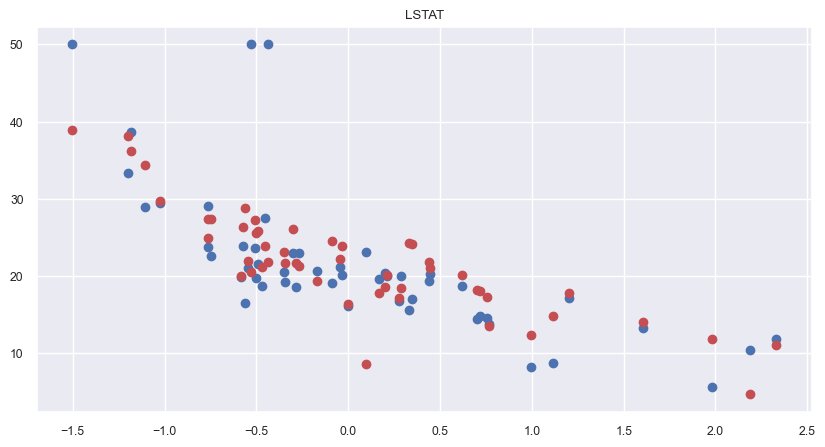

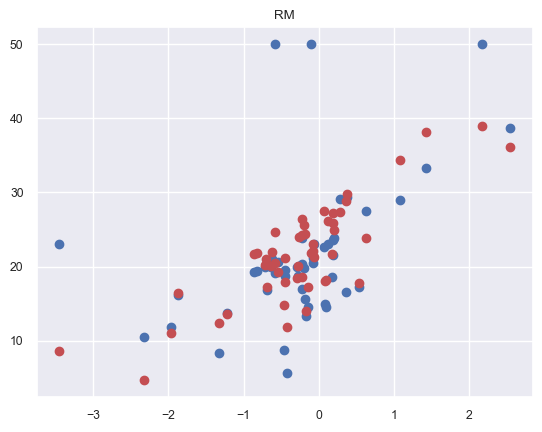

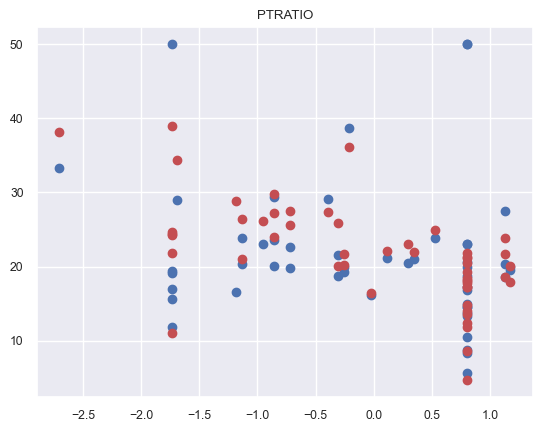

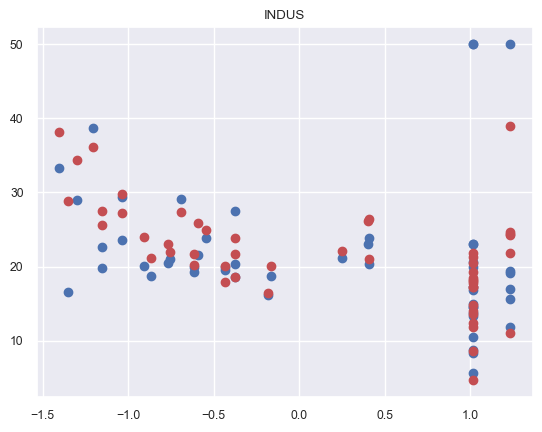

In [59]:
#4. 실제 데이터와 예측 데이터를 산점도 표시
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
lm_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']
for i, feature in enumerate(lm_features):
    plt.title(feature)
    plt.scatter(X_test[feature], y_test, label='y_test')
    plt.scatter(X_test[feature], y_test_pred, c='r', label='y_pred')
    #plt.plot(X_train, lr.predict(X_train), color='blue')
    plt.show()         

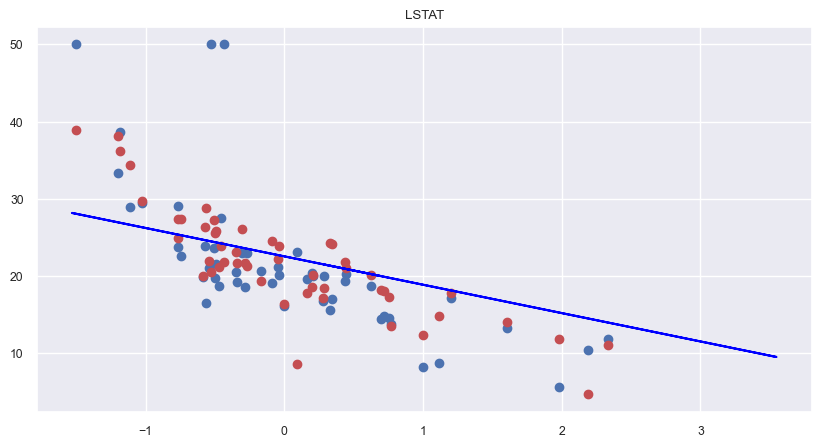

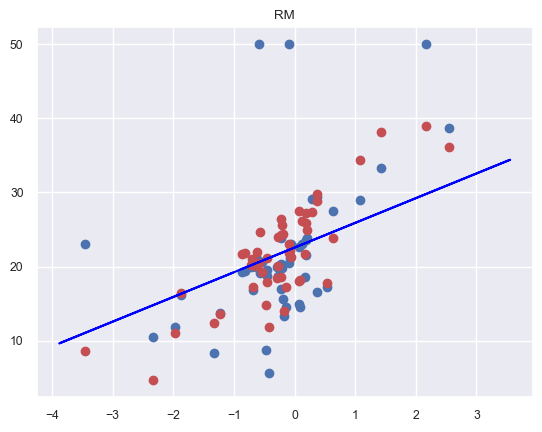

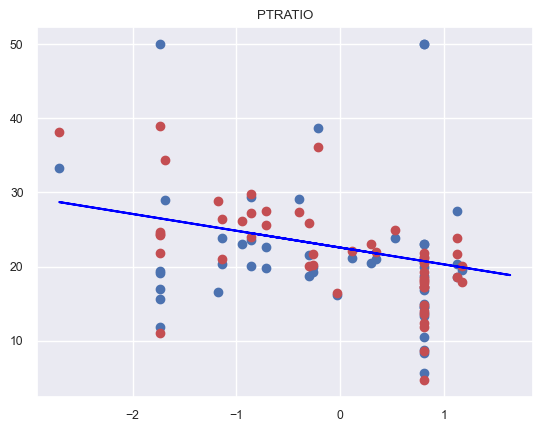

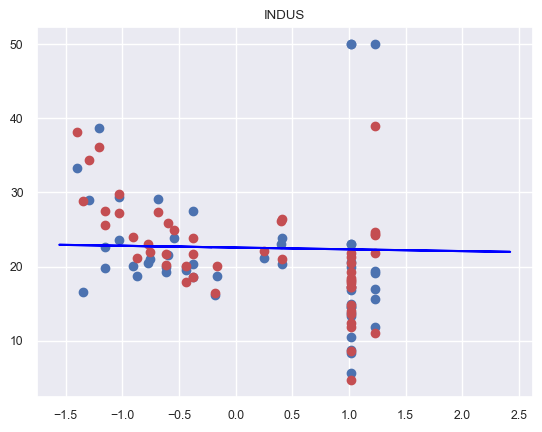

In [73]:
#5. 산점도위에 회기그래프(절편과 기울기, optional)
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
lm_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']
for i, feature in enumerate(lm_features):
    plt.title(feature)
    plt.scatter(X_test[feature], y_test, label='y_test')
    plt.scatter(X_test[feature], y_test_pred, c='r', label='y_pred')
    a = X_train[feature]
    b = lr.coef_[i]*a  + lr.intercept_
    plt.plot(a, b, color='blue')
    plt.show()      